**ANÁLISIS DE VENTAS: TIENDA WALMART**

In [1]:
#Carga de librerias

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf
import seaborn as sns
sns.set()
%matplotlib inline

from datetime import datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
#Carga de dataset
data = pd.read_csv('Walmart_dataset_modificado.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,08-01-2010,1425307.565,0,41.97,2.420,211.081890,7.545
1,1,15-01-2010,1360899.630,0,49.08,2.473,210.997826,7.545
2,1,22-01-2010,1346232.857,0,47.33,2.496,210.925603,7.545
3,1,29-01-2010,1318112.450,0,49.05,2.549,211.023576,7.545
4,1,05-02-2010,1643690.900,0,42.31,2.572,211.096358,8.106


In [3]:
#Información de la estructura de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         156 non-null    int64  
 1   Date          156 non-null    object 
 2   Weekly_Sales  156 non-null    float64
 3   Holiday_Flag  156 non-null    int64  
 4   Temperature   156 non-null    float64
 5   Fuel_Price    156 non-null    float64
 6   CPI           156 non-null    float64
 7   Unemployment  156 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 9.9+ KB


In [4]:
#Verificar si hay filas duplicadas
data.duplicated().sum()

0

In [5]:
#Verificar si hay celdas vacías
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
#Verificar la presencia de outliers

def check_outliers(data):
    for i in data.columns:
        if data[i].dtype!= 'object':
            sns.boxplot(data[i])
            plt.title(i)
            plt.show()

In [7]:
#Analisis de variables numericas

data_num = data[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
data_num.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1425307.565,41.97,2.420,211.081890,7.545
1,1360899.630,49.08,2.473,210.997826,7.545
2,1346232.857,47.33,2.496,210.925603,7.545
3,1318112.450,49.05,2.549,211.023576,7.545
4,1643690.900,42.31,2.572,211.096358,8.106


In [8]:
print (data_num.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count  1.560000e+02   156.000000  156.000000  156.000000    156.000000
mean   1.565936e+06    66.890192    3.222276  216.290285      7.548891
std    1.722914e+05    14.522686    0.435081    4.582083      0.440118
min    1.316899e+06    35.400000    2.420000  210.337426      6.573000
25%    1.456380e+06    54.500000    2.753000  211.529051      7.296750
50%    1.539824e+06    67.735000    3.309500  215.524203      7.742000
75%    1.625260e+06    80.422500    3.592500  221.379662      7.838000
max    2.387950e+06    91.650000    3.907000  223.444251      8.106000


c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


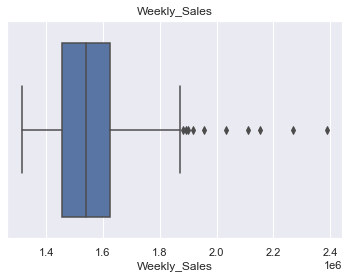

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


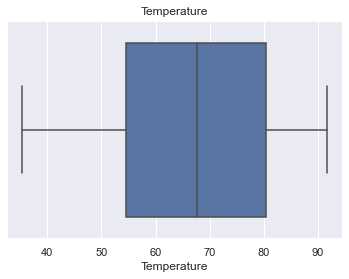

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


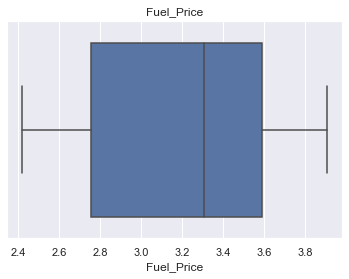

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


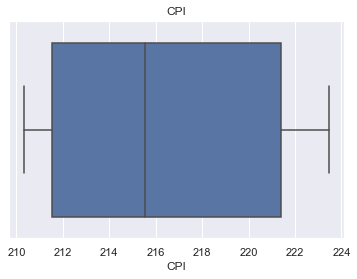

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


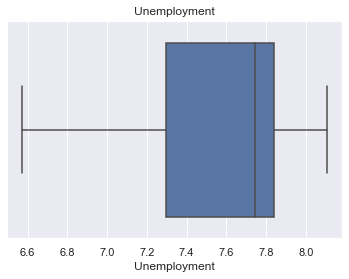

In [9]:
check_outliers (data_num)

C:\Users\JGEREZR\AppData\Local\Temp\ipykernel_21908\3743916429.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > upper_bound, upper_bound, data[i])
C:\Users\JGEREZR\AppData\Local\Temp\ipykernel_21908\3743916429.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < lower_bound, lower_bound, data[i])
c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.1

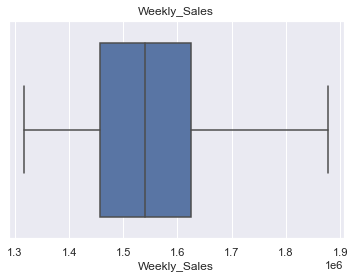

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


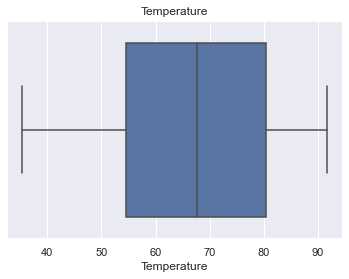

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


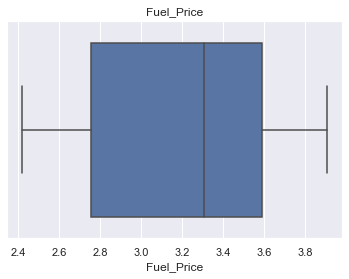

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


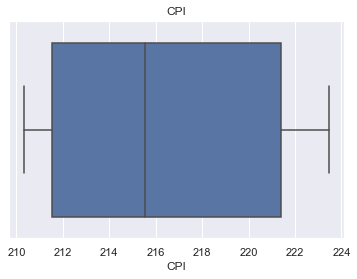

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


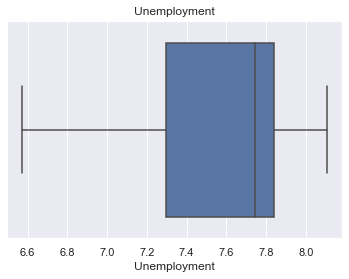

In [10]:
#Reemplazar outliers

def replace_outliers (data):
    for i in data.columns:
        if data[i].dtype!= 'object':
            q1 = data[i].quantile(0.25)
            q3 = data[i].quantile(0.75)
            iqr= q3-q1
            lower_bound = q1 - (1.5 * iqr) 
            upper_bound = q3 + (1.5 * iqr) 
            data[i] = np.where(data[i] > upper_bound, upper_bound, data[i]) 
            data[i] = np.where(data[i] < lower_bound, lower_bound, data[i]) 
    return data

data_num2 = replace_outliers(data_num)
check_outliers(data_num2)

In [11]:
#Se verifica que el maximo valor de las ventas fue reemplazado

print (data_num2.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count  1.560000e+02   156.000000  156.000000  156.000000    156.000000
mean   1.554953e+06    66.890192    3.222276  216.290285      7.548891
std    1.376559e+05    14.522686    0.435081    4.582083      0.440118
min    1.316899e+06    35.400000    2.420000  210.337426      6.573000
25%    1.456380e+06    54.500000    2.753000  211.529051      7.296750
50%    1.539824e+06    67.735000    3.309500  215.524203      7.742000
75%    1.625260e+06    80.422500    3.592500  221.379662      7.838000
max    1.878579e+06    91.650000    3.907000  223.444251      8.106000


In [12]:
#Analisis de variables categoricas

data_categ = ["Store", "Holiday_Flag"]
print(data[data_categ].value_counts)

<bound method DataFrame.value_counts of      Store  Holiday_Flag
0        1             0
1        1             0
2        1             0
3        1             0
4        1             0
..     ...           ...
151      1             0
152      1             0
153      1             0
154      1             0
155      1             1

[156 rows x 2 columns]>


In [13]:
print(data["Holiday_Flag"].value_counts())

0    144
1     12
Name: Holiday_Flag, dtype: int64


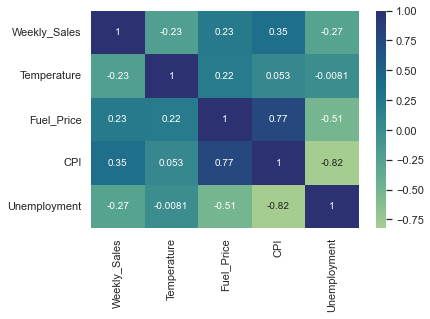

In [14]:
#Verificar si existe correlación entre las variables

corr = data[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].corr() 
sns.heatmap(corr, annot = True, cmap = "crest")
plt.show()

In [15]:
#Verificar el formato de la columna Date

data.Date.head()

0    08-01-2010
1    15-01-2010
2    22-01-2010
3    29-01-2010
4    05-02-2010
Name: Date, dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         156 non-null    int64  
 1   Date          156 non-null    object 
 2   Weekly_Sales  156 non-null    float64
 3   Holiday_Flag  156 non-null    int64  
 4   Temperature   156 non-null    float64
 5   Fuel_Price    156 non-null    float64
 6   CPI           156 non-null    float64
 7   Unemployment  156 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 9.9+ KB


In [17]:
#Modifico el formato de la columna Date

data["Date"] = pd.to_datetime(data["Date"], format='%d-%m-%Y')

In [18]:
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
print(data)

     Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1  2010-01-08   1425307.565             0       41.970       2.420   
1        1  2010-01-15   1360899.630             0       49.080       2.473   
2        1  2010-01-22   1346232.857             0       47.330       2.496   
3        1  2010-01-29   1318112.450             0       49.050       2.549   
4        1  2010-02-05   1643690.900             0       42.310       2.572   
..     ...         ...           ...           ...          ...         ...   
151      1  2012-11-30   1620134.120             0       49.090       3.582   
152      1  2012-12-07   1916750.510             0       49.090       3.580   
153      1  2012-12-14   1871318.410             0       45.130       3.592   
154      1  2012-12-21   2152427.780             0       50.735       3.588   
155      1  2012-12-28   1627605.430             1       50.145       3.586   

            CPI  Unemployment  
0    211.081890    

In [19]:
#Formato de la columna Date modificado

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         156 non-null    int64  
 1   Date          156 non-null    object 
 2   Weekly_Sales  156 non-null    float64
 3   Holiday_Flag  156 non-null    int64  
 4   Temperature   156 non-null    float64
 5   Fuel_Price    156 non-null    float64
 6   CPI           156 non-null    float64
 7   Unemployment  156 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 9.9+ KB


In [20]:
data.Date

0      2010-01-08
1      2010-01-15
2      2010-01-22
3      2010-01-29
4      2010-02-05
          ...    
151    2012-11-30
152    2012-12-07
153    2012-12-14
154    2012-12-21
155    2012-12-28
Name: Date, Length: 156, dtype: object

In [21]:
#Creacion de un dataset con las columnas Fecha y Ventas

df = pd.DataFrame({'Fecha': data['Date'],'Ventas': data['Weekly_Sales']})
df.head()

,Fecha,Ventas
0,2010-01-08,1425307.565
1,2010-01-15,1360899.630
2,2010-01-22,1346232.857
3,2010-01-29,1318112.450
4,2010-02-05,1643690.900


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   156 non-null    object 
 1   Ventas  156 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [23]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   156 non-null    datetime64[ns]
 1   Ventas  156 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [25]:
df.head()

,Fecha,Ventas
0,2010-01-08,1425307.565
1,2010-01-15,1360899.630
2,2010-01-22,1346232.857
3,2010-01-29,1318112.450
4,2010-02-05,1643690.900


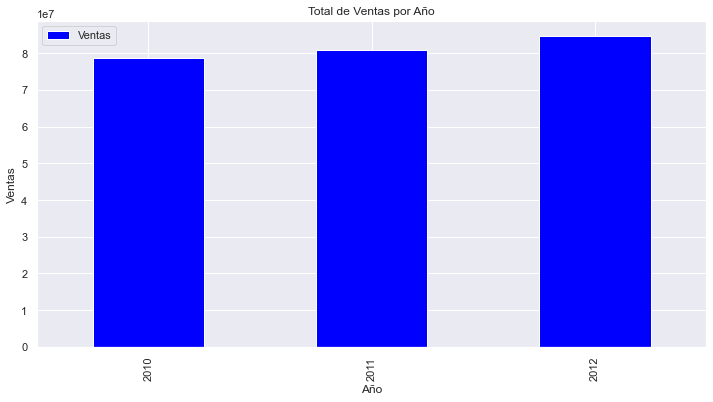

In [26]:
#Total de ventas agrupadas por año

data_agrupada_year = df.groupby(df['Fecha'].dt.to_period('Y')).sum()

#Gráfico de barras para la suma de ventas por mes
data_agrupada_year.plot(kind='bar', figsize=(12, 6), color= "blue")

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Año')

plt.show()

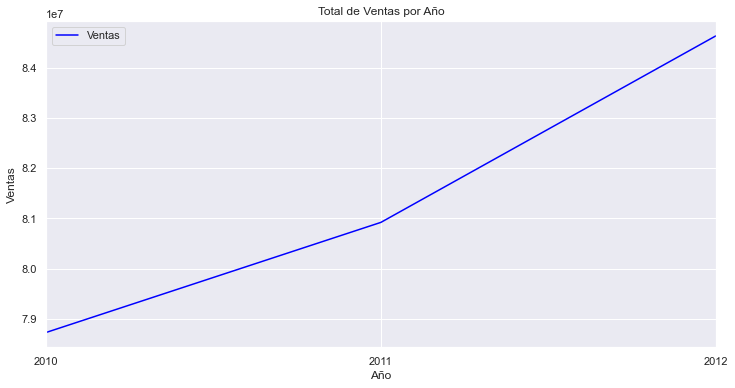

In [27]:
#Total de ventas agrupadas por año

data_agrupada_year1 = df.groupby(df['Fecha'].dt.to_period('Y')).sum()

#Gráfico de lineas para la suma de ventas por mes
data_agrupada_year1.plot(kind='line', figsize=(12, 6), color= "blue")

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Año')

plt.show()

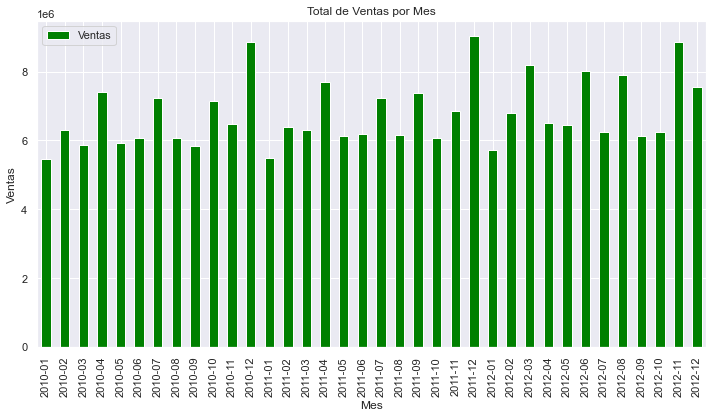

In [28]:
#Total de ventas agrupadas por mes
data_agrupada_month = df.groupby(df['Fecha'].dt.to_period('M')).sum()

#Gráfico de barras para la suma de ventas por mes
data_agrupada_month.plot(kind='bar', figsize=(12, 6), color= "green")

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Mes')

plt.show()

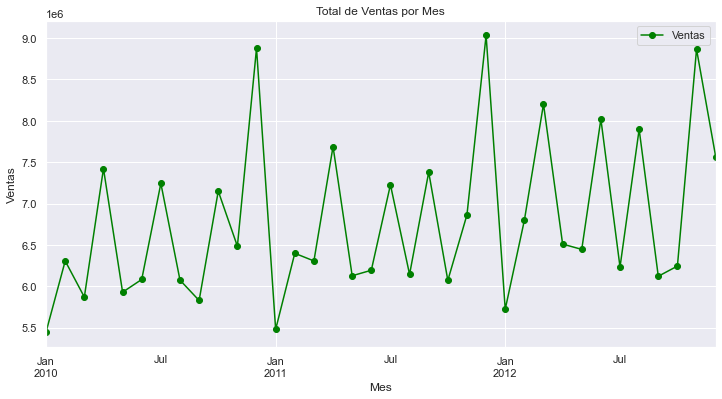

In [29]:
#Total de ventas agrupadas por mes
data_agrupada_month1 = df.groupby(df['Fecha'].dt.to_period('M')).sum()

#Gráfico de barras para la suma de ventas por mes
data_agrupada_month1.plot(kind='line', figsize=(12, 6), color= "green", marker='o', linestyle='-' )

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Mes')

plt.show()

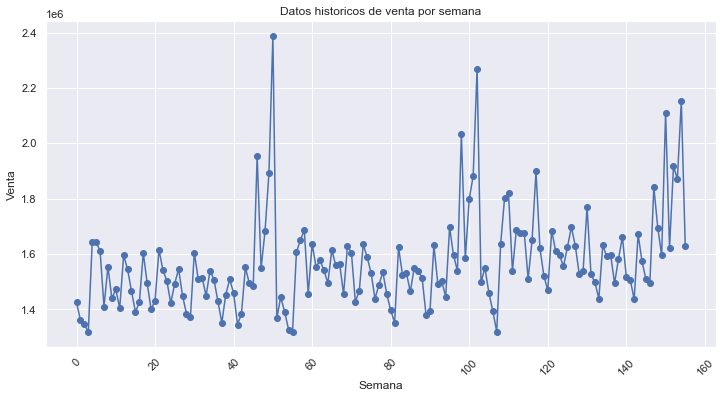

In [30]:
#Grafico de ventas por semana

plt.figure(figsize=(12, 6))
plt.plot(df.Ventas, marker='o', linestyle='-')
plt.xlabel('Semana')
plt.ylabel('Venta')
plt.title('Datos historicos de venta por semana')
plt.xticks(rotation=45)
plt.show()

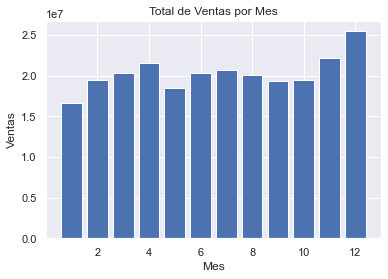

In [31]:
#Total de ventas agrupadas por mes
data_grouped_month2 = df.groupby(df['Fecha'].dt.month)['Ventas'].sum()

#Gráfico de barras para la suma de ventas por mes
plt.bar(data_grouped_month2.index, data_grouped_month2.values)
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Mes')
plt.show()


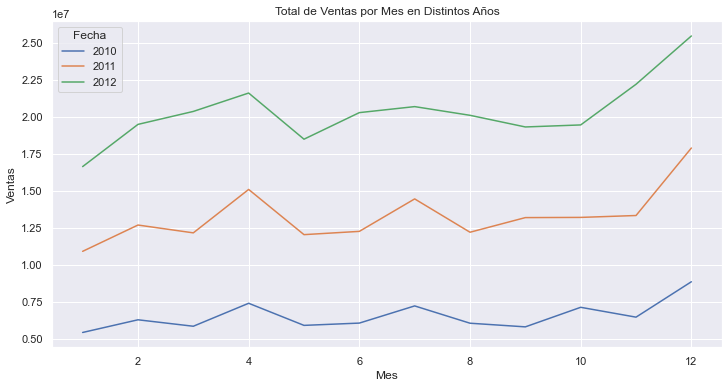

In [32]:
#Total de ventas agrupadas por mes y año

data_agrupada = df.groupby([df['Fecha'].dt.month, df['Fecha'].dt.year])['Ventas'].sum()

# Gráfico de linea para la suma de ventas por mes en distintos años

data_agrupada.unstack().plot(kind='line', stacked=True, figsize=(12, 6))

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Mes en Distintos Años')

plt.show()

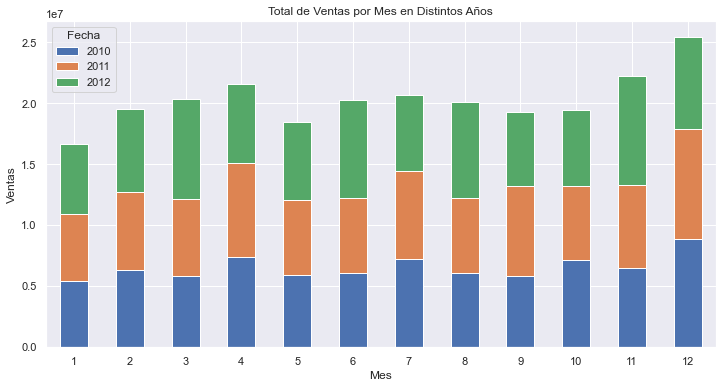

In [33]:
#Total de ventas agrupadas por mes y año

data_agrupada1 = df.groupby([df['Fecha'].dt.month, df['Fecha'].dt.year])['Ventas'].sum()

# Gráfico de barras para la suma de ventas por mes en distintos años

data_agrupada1.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Mes en Distintos Años')
plt.xticks(rotation=0)

plt.show()

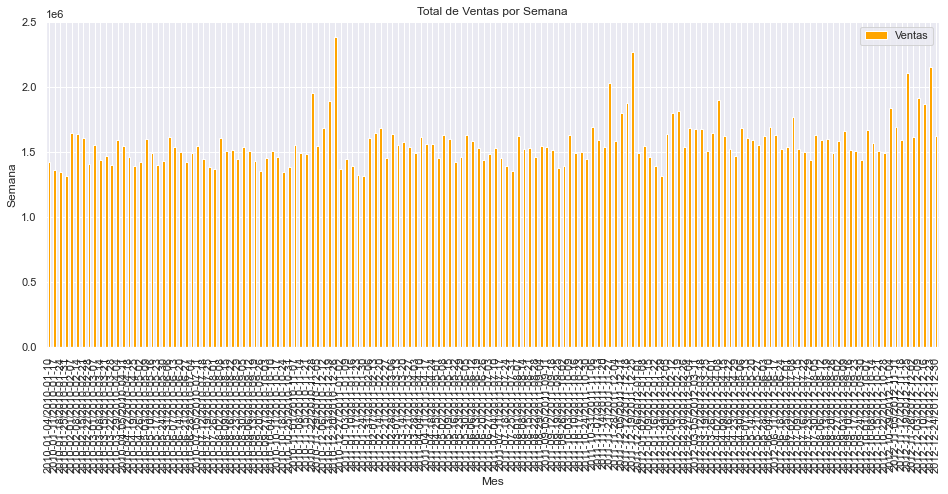

In [34]:
#Total de ventas agrupadas por semana
data_agrupada_week = df.groupby(df['Fecha'].dt.to_period('W')).sum()

#Gráfico de barras para la suma de ventas por semana
data_agrupada_week.plot(kind='bar', figsize=(16, 6), color= "orange")

plt.xlabel('Mes')
plt.ylabel('Semana')
plt.title('Total de Ventas por Semana')

plt.show()

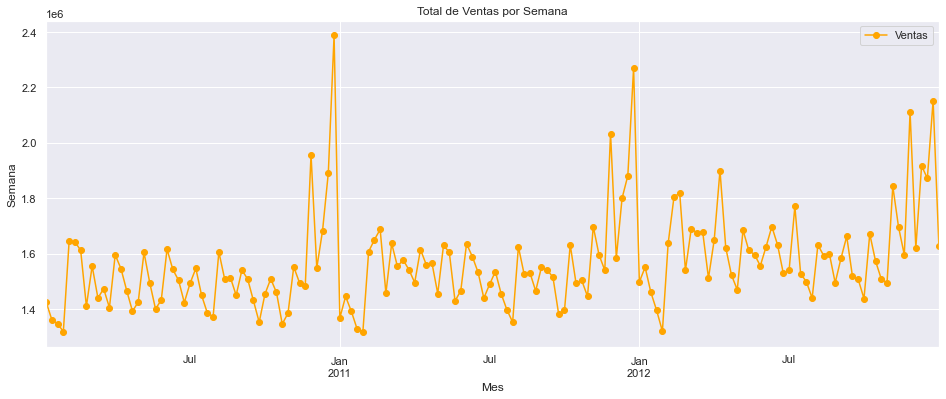

In [35]:
#Total de ventas agrupadas por semana
data_agrupada_week1 = df.groupby(df['Fecha'].dt.to_period('W')).sum()

#Gráfico de linea para la suma de ventas por semana
data_agrupada_week1.plot(kind='line', figsize=(16, 6), color= "orange", marker='o', linestyle='-')

plt.xlabel('Mes')
plt.ylabel('Semana')
plt.title('Total de Ventas por Semana')

plt.show()

C:\Users\JGEREZR\AppData\Local\Temp\ipykernel_21908\1750439783.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_agrupada2 = df.groupby([df['Fecha'].dt.week, df['Fecha'].dt.year])['Ventas'].sum()


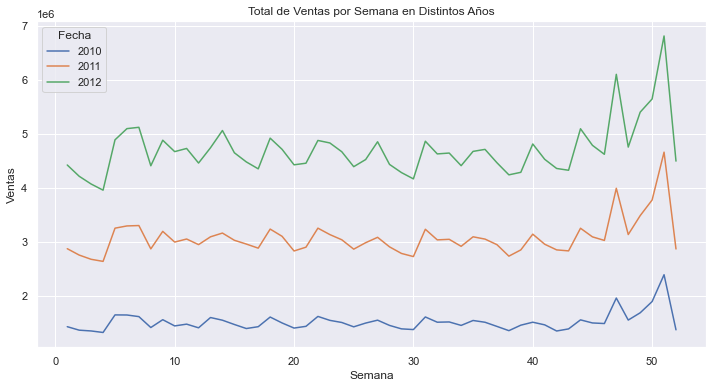

In [36]:
#Total de ventas agrupadas por semana en distintos años

data_agrupada2 = df.groupby([df['Fecha'].dt.week, df['Fecha'].dt.year])['Ventas'].sum()

# Gráfico de lineas para las ventas por semana en distintos años

data_agrupada2.unstack().plot(kind='line', stacked=True, figsize=(12, 6))

plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Semana en Distintos Años')
plt.xticks(rotation=0)

plt.show()

C:\Users\JGEREZR\AppData\Local\Temp\ipykernel_21908\114474933.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_agrupada3 = df.groupby([df['Fecha'].dt.week, df['Fecha'].dt.year])['Ventas'].sum()


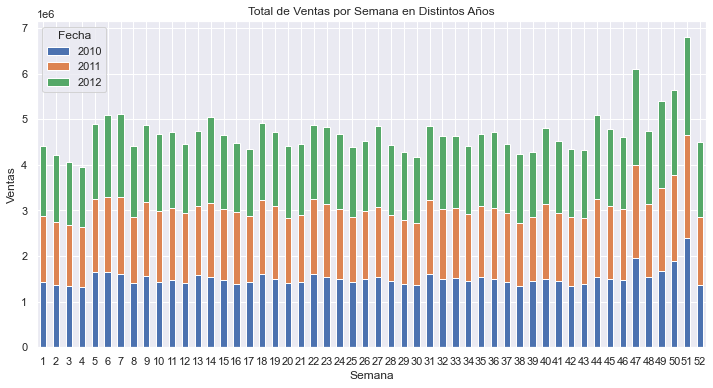

In [37]:
#Total de ventas agrupadas por semana en distintos años

data_agrupada3 = df.groupby([df['Fecha'].dt.week, df['Fecha'].dt.year])['Ventas'].sum()

# Gráfico de barra para las ventas por semana en distintos años

data_agrupada3.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Semana en Distintos Años')
plt.xticks(rotation=0)

plt.show()

**MODELO ARIMA**

In [38]:
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [39]:
#Convierto la fecha en el indice

df.set_index('Fecha', inplace=True)

In [40]:
df.head()

,Ventas
Fecha,
2010-01-08,1425307.565
2010-01-15,1360899.630
2010-01-22,1346232.857
2010-01-29,1318112.450
2010-02-05,1643690.900


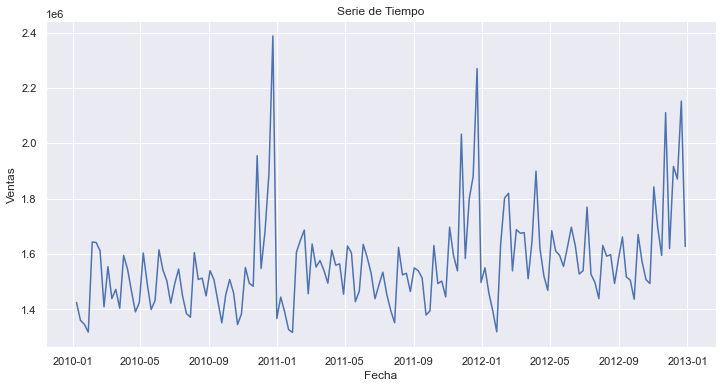

In [41]:
# Visualizacion de la serie de tiempo

plt.figure(figsize=(12, 6))
plt.plot(df)
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Serie de Tiempo')
plt.show()

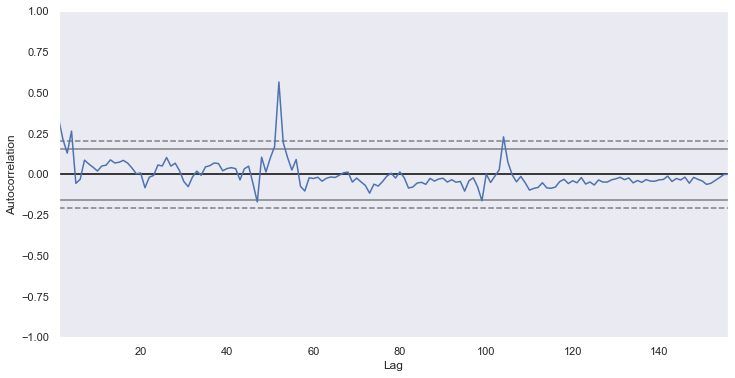

In [42]:
plt.figure(figsize=(12, 6))
autocorrelation_plot(df)
pyplot.show()

In [43]:
#Prueba Dickey-Fuller para verificar si la serie posee estacionalidad

result = sm.tsa.adfuller(df)

In [44]:
#Extraemos los resultados de la prueba
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("Estadístico de Dickey-Fuller:", adf_statistic)
print("Valor p:", p_value)
print("Valores críticos:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

Estadístico de Dickey-Fuller: -4.372461598766522
Valor p: 0.00033197442241564924
Valores críticos:
1%: -3.4744158894942156
5%: -2.880878382771059
10%: -2.577081275821236


In [45]:
#Verificamos el resultado de la prueba
if p_value <= 0.05:
    print("La serie de tiempo es estacionaria (no hay raíces unitarias).")
else:
    print("La serie de tiempo no es estacionaria (hay raíces unitarias).")

La serie de tiempo es estacionaria (no hay raíces unitarias).


Por lo tanto, se puede concluir que la serie de tiempo es estacionaria. Es decir, que no hay estacionalidad ni tendencia significativas. 

Parámetro d (Orden de diferenciación para hacer la serie estacionaria)
d=0 serie estacionaria

Autocorrelación Parcial (PACF) _ Parámetros p (número de términos autorregresivos)

c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


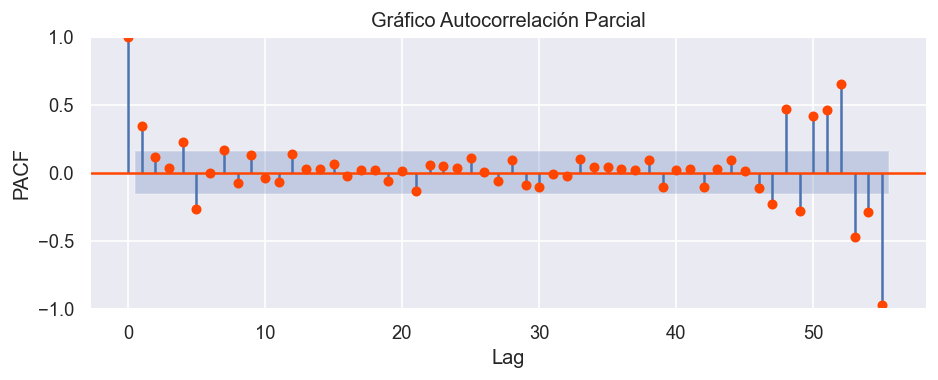

In [46]:
#Autocorrelacion parcial (pacf)

plt.rcParams.update({'figure.figsize': (9,3), 'figure.dpi' :120})
sm.graphics.tsa.plot_pacf(df, lags=55, color= "orangered" )
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Gráfico Autocorrelación Parcial')
plt.show()

Parámetro p = 52

Autocorrelación (ACF) _ Parámetros q (orden de la media móvil)

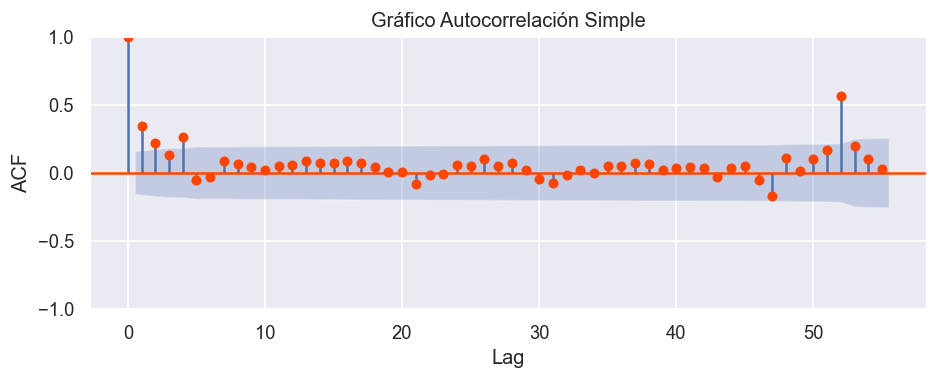

In [47]:
#Autocorrelacion (ACF)

plt.rcParams.update({'figure.figsize': (9,3), 'figure.dpi' :120})
sm.graphics.tsa.plot_acf(df, lags=55, color= "orangered")
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Gráfico Autocorrelación Simple')
plt.show()

Parámetro q = 52

ARIMA Modelo

c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py

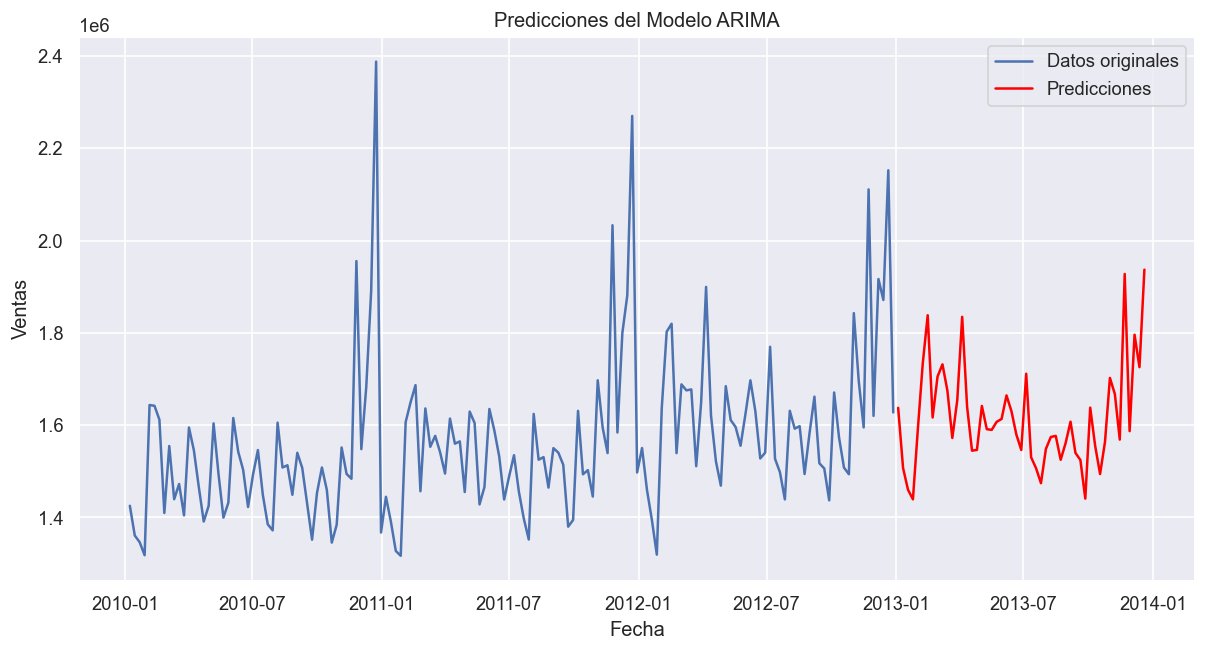

In [48]:
#Creación del modelo ARIMA
order = (52, 0, 52)  # Orden del modelo (p, d, q)
model = sm.tsa.ARIMA(df, order=order)
#Ajustar el modelo a los datos
results = model.fit()
#Obtener las predicciones del modelo
start_idx = len(df)
end_idx = start_idx + 50  # Predicción de 50 puntos hacia adelante
predictions = results.predict(start=start_idx, end=end_idx, dynamic=False, typ='levels')
#Visualizar las predicciones junto con los datos originales
plt.figure(figsize=(12, 6))
plt.plot(df, label='Datos originales')
plt.plot(predictions, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Predicciones del Modelo ARIMA')
plt.legend()
plt.show()

In [49]:
#summary of fit model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Ventas   No. Observations:                  156
Model:               ARIMA(52, 0, 52)   Log Likelihood               -2040.079
Date:                Wed, 26 Jul 2023   AIC                           4292.159
Time:                        14:26:53   BIC                           4615.444
Sample:                    01-08-2010   HQIC                          4423.463
                         - 12-28-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.566e+06   2.44e+05      6.411      0.000    1.09e+06    2.04e+06
ar.L1          0.0779     16.791      0.005      0.996     -32.831      32.987
ar.L2          0.0761     13.985      0.005      0.9

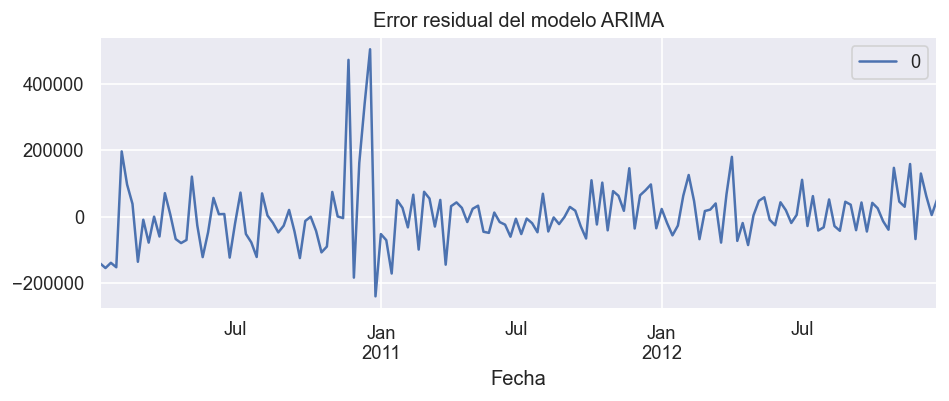

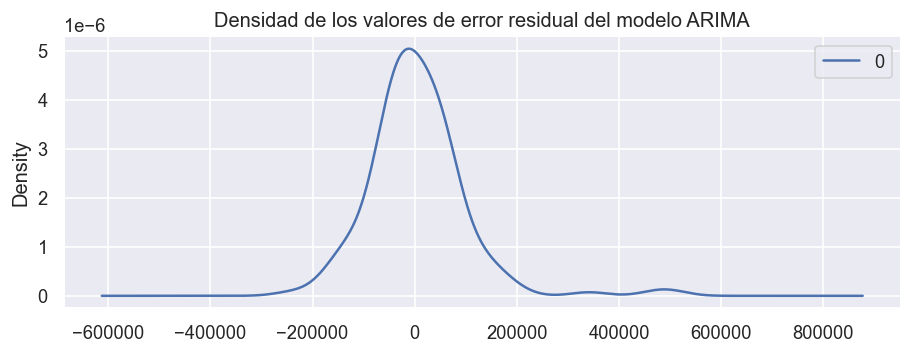

                   0
count     156.000000
mean     4965.846898
std     96450.463483
min   -240095.428780
25%    -44943.192346
50%     -3355.546156
75%     48246.108743
max    504450.705328


In [50]:
# line plot of residuals
residuals = DataFrame(results.resid)
residuals.plot()
plt.title('Error residual del modelo ARIMA')
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.title('Densidad de los valores de error residual del modelo ARIMA')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Los resultados muestran una media igual a cero en los valores residuales.

A continuación, podemos dividir el dataset en un conjunto de datos de entrenamiento y de prueba.
Es decir, usar el conjunto de entrenamiento para ajustar el modelo y generar una predicción para cada elemento en el conjunto de prueba.

In [51]:
#Split train and test
X = df.Ventas 
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [52]:
print(len(train), len(test))

124 32


ARIMA Modelo 1: p=5, d=0, q=1

In [53]:
#Creación del modelo ARIMA
for t in range(len(test)):
    model1 = sm.tsa.ARIMA(history, order=(5, 0, 1))
    results1 = model1.fit()
    output = results1.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1545847.226111, expected=1555444.550000
predicted=1612954.506859, expected=1624477.580000
predicted=1548679.513224, expected=1697230.960000
predicted=1603650.127937, expected=1630607.000000
predicted=1567555.880045, expected=1527845.810000
predicted=1556760.984221, expected=1540421.490000
predicted=1562834.925492, expected=1769854.160000
predicted=1616303.016172, expected=1527014.040000
predicted=1515105.256593, expected=1497954.760000
predicted=1526426.132984, expected=1439123.710000
predicted=1578347.761914, expected=1631135.790000
predicted=1505895.951453, expected=1592409.970000
predicted=1566384.494913, expected=1597868.050000
predicted=1545701.025612, expected=1494122.380000
predicted=1585561.065372, expected=1582083.400000
predicted=1546066.306595, expected=1661767.330000
predicted=1599574.787724, expected=1517428.870000
predicted=1506131.457135, expected=1506126.060000
predicted=1555593.989062, expected=1437059.260000
predicted=1533057.665367, expected=1670785.970000


In [54]:
len(test)

32

In [55]:
len(predictions)

32

In [56]:
predictions_series1 = pd.Series(predictions, index=test.index)
predictions_series1.head()

Fecha
2012-05-25    1.545847e+06
2012-06-01    1.612955e+06
2012-06-08    1.548680e+06
2012-06-15    1.603650e+06
2012-06-22    1.567556e+06
dtype: float64

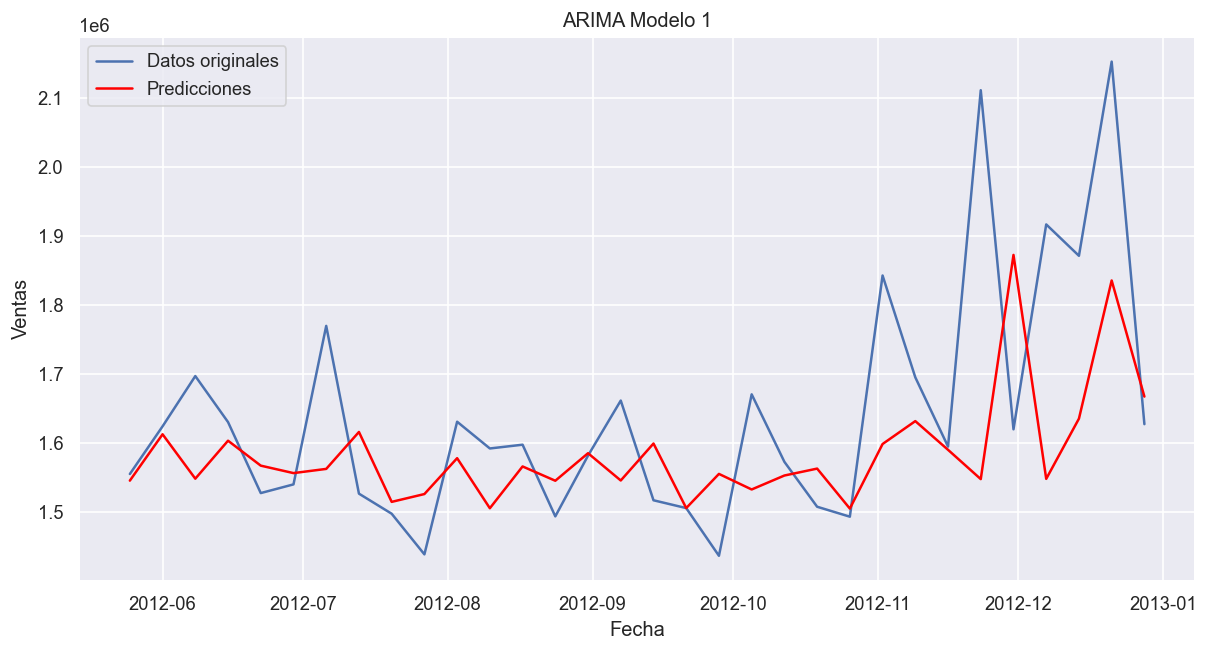

In [57]:
#Grafico del forecasts vs valores actuales
plt.figure(figsize=(12, 6))
plt.plot(test, label='Datos originales')
plt.plot(predictions_series1, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('ARIMA Modelo 1')
plt.legend()
plt.show()

In [58]:
#Calculo del error del modelo: RMSE (evaluate forecasts)
rmse1 = sqrt(mean_squared_error(test, predictions_series1))
print('Test RMSE: %.3f' % rmse1)

#Calculo del error cuadratico medio del modelo: MSE (evaluate forecasts)
mse1 = mean_squared_error(test, predictions_series1)
print('Test MSE: %.3f' % mse1)

#Calculo del error absoluto medio del modelo: MAE (evaluate forecasts)
mae1 = mean_absolute_error(test, predictions_series1)
print('Test MAE: %.3f' % mae1)

#Calculo del error porcentual Absoluto Medio del modelo: MAPE (evaluate forecasts)
mape1 = mean_absolute_percentage_error(test, predictions_series1)
print('Test MAPE: %.3f' % mape1)

Test RMSE: 166931.919
Test MSE: 27866265464.318
Test MAE: 109639.104
Test MAPE: 0.062


ARIMA Modelo 2: p=52, d=0, q=1

In [59]:
#Split train and test
X = df.Ventas 
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history2 = [x for x in train]
predictions2 = list()

In [60]:
#Creación del modelo ARIMA
for t in range(len(test)):
    model2 = sm.tsa.ARIMA(history2, order=(52, 0, 1))
    results2 = model2.fit()
    output = results2.forecast()
    yhat = output[0]
    predictions2.append(yhat)
    obs = test[t]
    history2.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1580719.537019, expected=1555444.550000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1700700.090832, expected=1624477.580000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1601627.911458, expected=1697230.960000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1589574.467914, expected=1630607.000000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1511050.474988, expected=1527845.810000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1503258.147692, expected=1540421.490000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1564369.329379, expected=1769854.160000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1576200.272716, expected=1527014.040000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1377550.477460, expected=1497954.760000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1413588.745446, expected=1439123.710000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1635481.508537, expected=1631135.790000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1485761.223178, expected=1592409.970000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1601049.189949, expected=1597868.050000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1473594.704972, expected=1494122.380000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1496037.169074, expected=1582083.400000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1563928.181815, expected=1661767.330000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1514400.964358, expected=1517428.870000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1370570.855939, expected=1506126.060000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1413894.280555, expected=1437059.260000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1608959.706184, expected=1670785.970000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1508600.713863, expected=1573072.810000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1502707.602786, expected=1508068.770000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1468589.507718, expected=1493659.740000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1642049.795910, expected=1842799.880000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1661130.262359, expected=1695398.290000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1506524.484125, expected=1595183.220000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2005798.200765, expected=2111017.210000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1624206.412503, expected=1620134.120000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1753240.771181, expected=1916750.510000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1856044.592932, expected=1871318.410000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2217155.047714, expected=2152427.780000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1495964.467263, expected=1627605.430000


In [61]:
predictions_series2 = pd.Series(predictions2, index=test.index)
predictions_series2.head()

Fecha
2012-05-25    1.580720e+06
2012-06-01    1.700700e+06
2012-06-08    1.601628e+06
2012-06-15    1.589574e+06
2012-06-22    1.511050e+06
dtype: float64

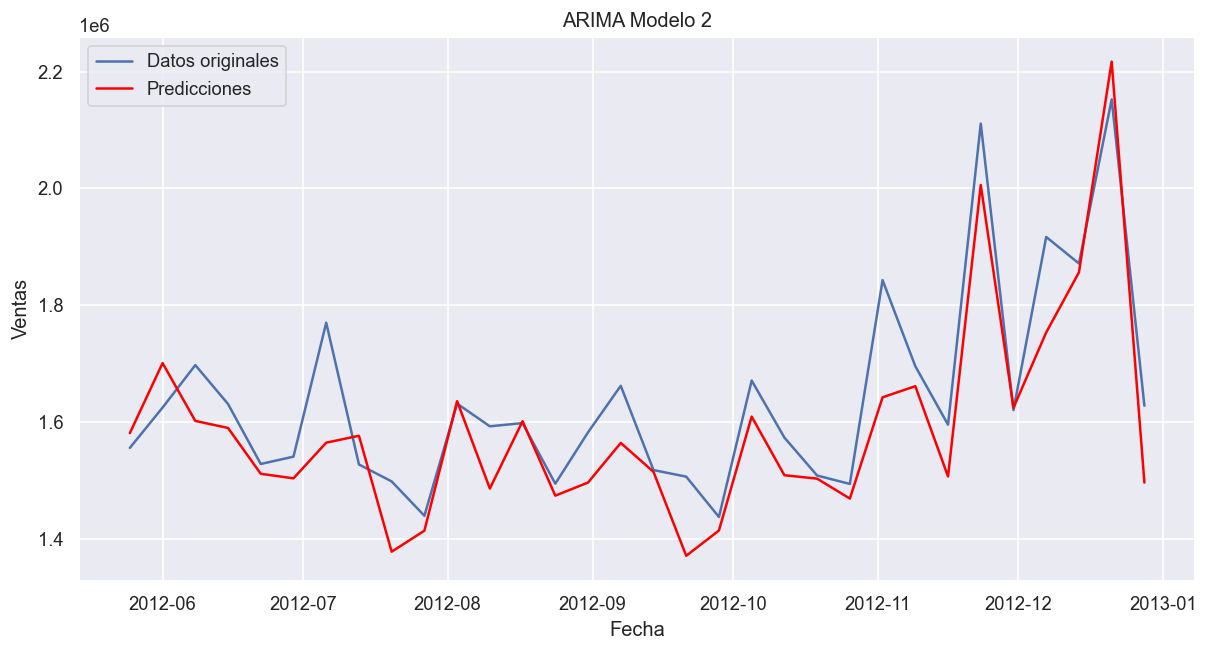

In [62]:
#Grafico del forecasts vs valores actuales
plt.figure(figsize=(12, 6))
plt.plot(test, label='Datos originales')
plt.plot(predictions_series2, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('ARIMA Modelo 2')
plt.legend()
plt.show()

In [63]:
#Calculo del error del modelo: RMSE (evaluate forecasts)
rmse2 = sqrt(mean_squared_error(test, predictions_series2))
print('Test RMSE: %.3f' % rmse2)

#Calculo del error cuadratico medio del modelo: MSE (evaluate forecasts)
mse2 = mean_squared_error(test, predictions_series2)
print('Test MSE: %.3f' % mse2)

#Calculo del error absoluto medio del modelo: MAE (evaluate forecasts)
mae2 = mean_absolute_error(test, predictions_series2)
print('Test MAE: %.3f' % mae2)

#Calculo del error porcentual Absoluto Medio del modelo: MAPE (evaluate forecasts)
mape2 = mean_absolute_percentage_error(test, predictions_series2)
print('Test MAPE: %.3f' % mape2)

Test RMSE: 87320.673
Test MSE: 7624900000.202
Test MAE: 66809.016
Test MAPE: 0.040


ARIMA Modelo 3: p=52, d=0, q=52

In [64]:
#Split train and test
X = df.Ventas 
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history3 = [x for x in train]
predictions3 = list()

In [65]:
#Creación del modelo ARIMA
for t in range(len(test)):
    model3 = sm.tsa.ARIMA(history3, order=(52, 0, 52))
    results3 = model3.fit()
    output = results3.forecast()
    yhat = output[0]
    predictions3.append(yhat)
    obs = test[t]
    history3.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1579523.179708, expected=1555444.550000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1639161.180905, expected=1624477.580000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1611979.789912, expected=1697230.960000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1601758.120465, expected=1630607.000000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1545003.825736, expected=1527845.810000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1519193.063278, expected=1540421.490000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1563586.746441, expected=1769854.160000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1559460.837337, expected=1527014.040000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1398506.918675, expected=1497954.760000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1468322.680763, expected=1439123.710000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1669246.771991, expected=1631135.790000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1489410.010345, expected=1592409.970000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1649089.567647, expected=1597868.050000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1539924.050949, expected=1494122.380000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1497379.686382, expected=1582083.400000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1600428.900240, expected=1661767.330000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1556845.286703, expected=1517428.870000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1432216.792459, expected=1506126.060000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1505810.589946, expected=1437059.260000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1600695.892427, expected=1670785.970000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1546443.369916, expected=1573072.810000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1544342.633785, expected=1508068.770000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1538868.539011, expected=1493659.740000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1643677.314964, expected=1842799.880000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1623593.146434, expected=1695398.290000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1553483.504796, expected=1595183.220000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1898306.337016, expected=2111017.210000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1726193.991826, expected=1620134.120000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1717637.263978, expected=1916750.510000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1775127.041179, expected=1871318.410000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2149700.153259, expected=2152427.780000


c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1541741.253864, expected=1627605.430000


In [66]:
predictions_series3 = pd.Series(predictions3, index=test.index)
predictions_series3.head()

Fecha
2012-05-25    1.579523e+06
2012-06-01    1.639161e+06
2012-06-08    1.611980e+06
2012-06-15    1.601758e+06
2012-06-22    1.545004e+06
dtype: float64

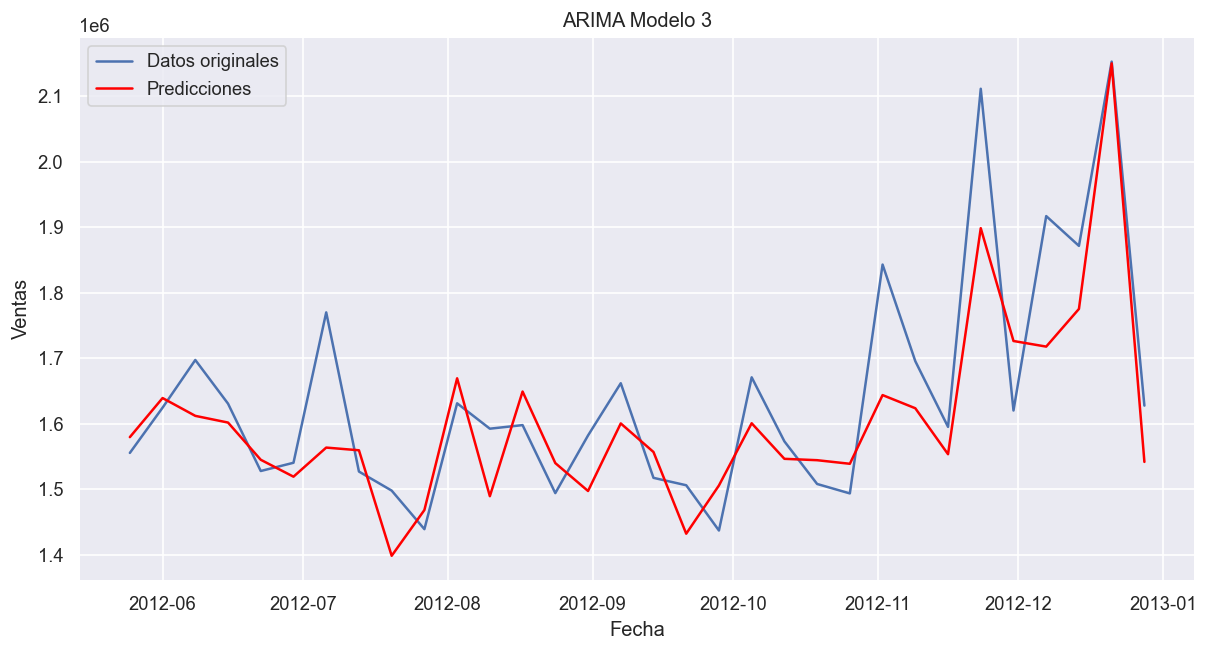

In [67]:
#Grafico del forecasts vs valores actuales
plt.figure(figsize=(12, 6))
plt.plot(test, label='Datos originales')
plt.plot(predictions_series3, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('ARIMA Modelo 3')
plt.legend()
plt.show()

In [68]:
#Calculo del error del modelo: RMSE (evaluate forecasts)
rmse3 = sqrt(mean_squared_error(test, predictions_series3))
print('Test RMSE: %.3f' % rmse3)

#Calculo del error cuadratico medio del modelo: MSE (evaluate forecasts)
mse3 = mean_squared_error(test, predictions_series3)
print('Test MSE: %.3f' % mse3)

#Calculo del error absoluto medio del modelo: MAE (evaluate forecasts)
mae3 = mean_absolute_error(test, predictions_series3)
print('Test MAE: %.3f' % mae3)

#Calculo del error porcentual Absoluto Medio del modelo: MAPE (evaluate forecasts)
mape3 = mean_absolute_percentage_error(test, predictions_series3)
print('Test MAPE: %.3f' % mape3)


Test RMSE: 92152.135
Test MSE: 8492015957.796
Test MAE: 72448.744
Test MAPE: 0.043


Resultados Modelos ARIMA:

In [69]:
print('Modelo 1 RMSE: %.3f' % rmse1)
print('Modelo 2 RMSE: %.3f' % rmse2)
print('Modelo 3 RMSE: %.3f' % rmse3)

Modelo 1 RMSE: 166931.919
Modelo 2 RMSE: 87320.673
Modelo 3 RMSE: 92152.135


**MODELO LSTM**

In [70]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [71]:
df.head()

,Ventas
Fecha,
2010-01-08,1425307.565
2010-01-15,1360899.630
2010-01-22,1346232.857
2010-01-29,1318112.450
2010-02-05,1643690.900


In [72]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [73]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train1, test1 = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train1), len(test1))

124 32


In [74]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [75]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train1, look_back)
testX, testY = create_dataset(test1, look_back)

In [76]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [77]:
# create and fit the LSTM network
model4 = Sequential()
model4.add(LSTM(4, input_shape=(1, look_back)))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


122/122 - 4s - loss: 0.0467 - 4s/epoch - 35ms/step
Epoch 2/100
122/122 - 0s - loss: 0.0267 - 337ms/epoch - 3ms/step
Epoch 3/100
122/122 - 0s - loss: 0.0237 - 371ms/epoch - 3ms/step
Epoch 4/100
122/122 - 0s - loss: 0.0235 - 338ms/epoch - 3ms/step
Epoch 5/100
122/122 - 0s - loss: 0.0233 - 324ms/epoch - 3ms/step
Epoch 6/100
122/122 - 0s - loss: 0.0233 - 309ms/epoch - 3ms/step
Epoch 7/100
122/122 - 0s - loss: 0.0232 - 309ms/epoch - 3ms/step
Epoch 8/100
122/122 - 0s - loss: 0.0230 - 307ms/epoch - 3ms/step
Epoch 9/100
122/122 - 0s - loss: 0.0230 - 302ms/epoch - 2ms/step
Epoch 10/100
122/122 - 0s - loss: 0.0228 - 291ms/epoch - 2ms/step
Epoch 11/100
122/122 - 0s - loss: 0.0228 - 324ms/epoch - 3ms/step
Epoch 12/100
122/122 - 0s - loss: 0.0227 - 296ms/epoch - 2ms/step
Epoch 13/100
122/122 - 0s - loss: 0.0226 - 312ms/epoch - 3ms/step
Epoch 14/100
122/122 - 0s - loss: 0.0226 - 313ms/epoch - 3ms/step
Epoch 15/100
122/122 - 0s - loss: 0.0225 - 308ms/epoch - 3ms/step
Epoch 16/100
122/122 - 0s - loss:

In [78]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [79]:
# make predictions
trainPredict = model4.predict(trainX)
testPredict = model4.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 34ms/step
Train Score: 154987.26 RMSE
Test Score: 179193.26 RMSE


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


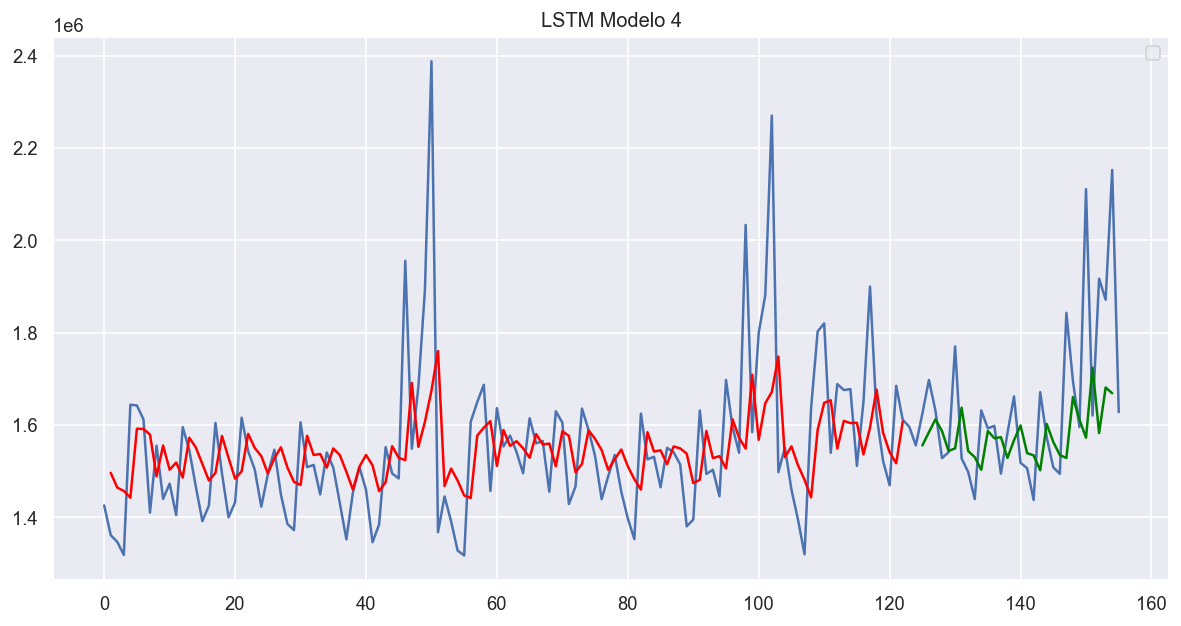

In [80]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, color='red')
plt.plot(testPredictPlot, color='green')
plt.title('LSTM Modelo 4')
plt.legend()
plt.show()
